## Data wrangling

| Column Name | Description                                                                                                                                                                              | Data Format         | Handling Missing Data                                                                        | feature engineering                                             |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------- | -------------------------------------------------------------------------------------------- | --------------------------------------------------------------- |
| STATE       |                                                                                                                                                                                          | categorical         | done                                                                                         | create democratic/republican and four regions for visualization |
| PHYSHLTH    | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?                        | numeric             | impute 77, 99, BLANK with median of remaining values (1-30)<br>impute 88 with 0              |                                                                 |
| MENTHLTH    | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?         | numeric             | impute 77, 99, BLANK with median of remaining values (1-30)<br>impute 88 with 0              |                                                                 |
| ASTHMA3     | (Ever told) (you had) asthma?                                                                                                                                                            | categorical         | done                                                                                         |                                                                 |
| HAVARTH5    | Has a doctor, nurse or other health professional ever told you that you had some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?                                  | categorical         | let BLANK be another category                                                                |                                                                 |
| _MICHD      | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)                                                                                    | categorical         | let BLANK be another category                                                                |                                                                 |
| _PRACE1     | Preferred race category                                                                                                                                                                  | categorical         | combine 77, 99, BLANK into one category                                                      | Replaced 99 and blank with 77. Done                             |
| _HISPANC    | Hispanic, Latino/a, or Spanish                                                                                                                                                           | categorical         | done                                                                                         | Done                                                            |
| _SEX        | Male, Female                                                                                                                                                                             | categorical         | done                                                                                         | Done                                                            |
| _AGEG5YR    | age grouped by 5 year                                                                                                                                                                    | ordered categorical | Drop 14 because note says 7 <= AGE <= 9 and we think some young children might be responding | Done                                                            |
| _EDUCAG     | Level of education completed                                                                                                                                                             | ordered categorical | Impute 9 with median                                                                         | Done                                                            |
| INCOME3     | Is your annual household income from all sources:                                                                                                                                        | ordered categorical | Impute 77, 99, BLANK with median                                                             | Replaced blank with 77, impute median. Done                     |
| HTIN4       | Reported height in inches                                                                                                                                                                | numeric             | Impute BLANK with median                                                                |                                                                 |
| RENTHOM1    | Rent or Own home                                                                                                                                                                         | categorical         | combine 7, 9, BLANK into one category                                                        |                                                                 |
| PRIMINSR    | What is the current primary source of your health insurance?                                                                                                                             | categorical         | combine 77, 99, BLANK into one category                                                      |                                                                 |
| EXERANY2    | During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise? | categorical         | combine 7, 9, BLANK into one category                                                        |                                                                 |
| _CHLDCNT    | Number of children in household                                                                                                                                                          | ordered categorical | Impute 9 with median                                                                         |                                                                 |
| _DRNKWK1    | Total number of alcoholic beverages consumed per week                                                                                                                                    | numeric             | Impute 99900 with median or round average                                                    |                                                                 |
| FTJUDA2_    | Fruit juice intake in times per day                                                                                                                                                      | numeric             | Impute BLANK with median                                                                |                                                                 |
| FRUTDA2_    | Fruit intake in times per day                                                                                                                                                            | numeric             | Impute BLANK with median                                                                |                                                                 |
| GRENDA1_    | Dark green vegetable intake in times per day                                                                                                                                             | numeric             | Impute BLANK with median                                                                |                                                                 |
| FRNCHDA_    | French Fry intake in times per day                                                                                                                                                       | numeric             | Impute BLANK with median                                                                |                                                                 |
| POTADA1_    | Potato servings per day                                                                                                                                                                  | numeric             | Impute BLANK with median                                                                |                                                                 |
| VEGEDA2_    | Other vegetable intake in times per day                                                                                                                                                  | numeric             | Impute BLANK with median                                                                |                                                                 |
| _BMI5       | Body Mass Index (BMI)                                                                                                                                                                    | numeric             | remove BLANK                                                                                 |                                                                 |
| _BMI5CAT    | "Underweight", 'Normal Weight', 'Overweight', 'Obese'                                                                                                                                    | categorical         | remove BLANK                                                                                 |                                                                 |

### Load survey data

STEPS:
1. Drop _AGEG5YR == 14 & _BMI5 is null & _BMI5CAT is null
2. Subset data to the columns you were assigned + the two purple BMI ones.
3. Handle missing data in your columns according to column E ([link](https://docs.google.com/spreadsheets/d/1vi9AastNMsGhh6_oqqyNZ0E03umcUtkz-fSjITP0_to/edit#gid=703849429)).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

In [2]:
df = pd.read_csv("llcp2021.csv", 
                 usecols = [ '_BMI5', '_BMI5CAT','_AGEG5YR', 
                            'PHYSHLTH', 'MENTHLTH','ASTHMA3','HAVARTH5','_MICHD', '_STATE', 
                            '_PRACE1','_HISPANC','_SEX','_EDUCAG','INCOME3', 
                            '_DRNKWK1', 'FTJUDA2_', 'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_', 'POTADA1_', 'VEGEDA2_',
                            'RENTHOM1', 'PRIMINSR', 'EXERANY2','HTIN4', '_CHLDCNT'])
df = df.dropna(subset=['_BMI5', '_BMI5CAT'])
df = df[df['_AGEG5YR'] != 14]
print(df.shape)
df.head()


(387021, 26)


,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,INCOME3,_MICHD,...,_BMI5CAT,_CHLDCNT,_EDUCAG,_DRNKWK1,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_
0,1.0,20.0,10.0,3.0,2.0,1.0,1.0,1.0,5.0,2.0,...,1.0,1.0,2.0,0.0,0.0,100.0,57.0,43.0,14.0,100.0
2,1.0,88.0,88.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,...,3.0,1.0,2.0,0.0,0.0,100.0,0.0,14.0,14.0,43.0
3,1.0,88.0,10.0,2.0,1.0,2.0,2.0,1.0,7.0,2.0,...,4.0,1.0,2.0,300.0,71.0,43.0,10.0,57.0,27.0,71.0
4,1.0,30.0,88.0,3.0,1.0,2.0,2.0,1.0,4.0,1.0,...,3.0,1.0,1.0,0.0,0.0,100.0,100.0,29.0,29.0,100.0
5,1.0,88.0,88.0,3.0,2.0,2.0,2.0,1.0,6.0,2.0,...,2.0,1.0,3.0,0.0,0.0,29.0,14.0,0.0,14.0,14.0


In [3]:
df.describe()

,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,INCOME3,_MICHD,...,_BMI5CAT,_CHLDCNT,_EDUCAG,_DRNKWK1,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_
count,387021.000000,387019.000000,387021.000000,387020.000000,387021.000000,387021.000000,387021.000000,387021.000000,387015.000000,383296.000000,...,387021.000000,387021.000000,387021.000000,387021.000000,361865.000000,362698.000000,362110.000000,361626.000000,358516.000000,358373.000000
mean,30.765483,62.783982,59.383767,9.703561,1.250483,1.875901,1.698711,1.369223,20.597845,1.915614,...,3.010183,1.536043,3.053529,4656.688598,44.453636,132.418224,77.203358,25.734466,28.631032,136.721837
std,15.418068,36.386319,37.630213,23.335046,0.498091,0.459756,0.620143,0.749144,31.118084,0.277967,...,0.833211,1.124849,0.981444,20396.221942,362.615610,491.084071,450.616948,169.407400,177.885293,634.293990
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,21.000000,15.000000,1.000000,1.000000,2.000000,1.000000,1.000000,6.000000,2.000000,...,2.000000,1.000000,2.000000,0.000000,0.000000,43.000000,14.000000,3.000000,7.000000,43.000000
50%,31.000000,88.000000,88.000000,3.000000,1.000000,2.000000,2.000000,1.000000,7.000000,2.000000,...,3.000000,1.000000,3.000000,23.000000,3.000000,100.000000,43.000000,14.000000,14.000000,86.000000
75%,42.000000,88.000000,88.000000,3.000000,1.000000,2.000000,2.000000,2.000000,10.000000,2.000000,...,4.000000,2.000000,4.000000,350.000000,33.000000,100.000000,71.000000,29.000000,29.000000,100.000000
max,78.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,99.000000,2.000000,...,4.000000,9.000000,9.000000,99900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000


### Lauren's changes

In [4]:
cols = ['HTIN4', '_CHLDCNT', '_DRNKWK1', 'FTJUDA2_', 'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_', 'POTADA1_', 'VEGEDA2_', '_BMI5', '_BMI5CAT'] # edit this list to include all the relevant columns

two_implied_decimals = ['FTJUDA2_', 'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_', 'POTADA1_', 'VEGEDA2_', '_BMI5']

to_replace_dict = {'_CHLDCNT': 9, '_DRNKWK1': 99900, 'FTJUDA2_': 9900, 'FRUTDA2_': 9900, 'GRENDA1_': 9900, 'FRNCHDA_': 9900, 'POTADA1_': 9900, 'VEGEDA2_': 9900}
# CLEANING NUMERIC COLUMNS
for col in cols:
    if col in to_replace_dict:
        df[col] = df[col].replace(to_replace=to_replace_dict[col]) # replace certain values with None
    df[col] = df[col].fillna(df[col].median()) # impute None values with mean
    if col in two_implied_decimals:
        df[col] /= 100 # divide by 100 (bc 2 implied decimal places)

In [5]:
df.describe()

,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,INCOME3,_MICHD,...,_BMI5CAT,_CHLDCNT,_EDUCAG,_DRNKWK1,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_
count,387021.000000,387019.000000,387021.000000,387020.000000,387021.000000,387021.000000,387021.000000,387021.000000,387015.000000,383296.000000,...,387021.000000,387021.000000,387021.000000,387021.000000,387021.000000,387021.000000,387021.000000,387021.000000,387021.000000,387021.000000
mean,30.765483,62.783982,59.383767,9.703561,1.250483,1.875901,1.698711,1.369223,20.597845,1.915614,...,3.010183,1.496671,3.053529,297.278907,0.307158,1.101911,0.575434,0.227694,0.251054,0.978556
std,15.418068,36.386319,37.630213,23.335046,0.498091,0.459756,0.620143,0.749144,31.118084,0.277967,...,0.833211,0.987317,0.981444,901.862981,1.182941,1.689076,1.350386,0.717675,0.717338,1.712293
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,21.000000,15.000000,1.000000,1.000000,2.000000,1.000000,1.000000,6.000000,2.000000,...,2.000000,1.000000,2.000000,0.000000,0.000000,0.430000,0.140000,0.070000,0.070000,0.430000
50%,31.000000,88.000000,88.000000,3.000000,1.000000,2.000000,2.000000,1.000000,7.000000,2.000000,...,3.000000,1.000000,3.000000,23.000000,0.030000,1.000000,0.430000,0.140000,0.140000,0.860000
75%,42.000000,88.000000,88.000000,3.000000,1.000000,2.000000,2.000000,2.000000,10.000000,2.000000,...,4.000000,2.000000,4.000000,280.000000,0.290000,1.000000,0.710000,0.290000,0.290000,1.000000
max,78.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,99.000000,2.000000,...,4.000000,6.000000,9.000000,53200.000000,98.000000,98.000000,98.000000,98.000000,89.000000,92.000000


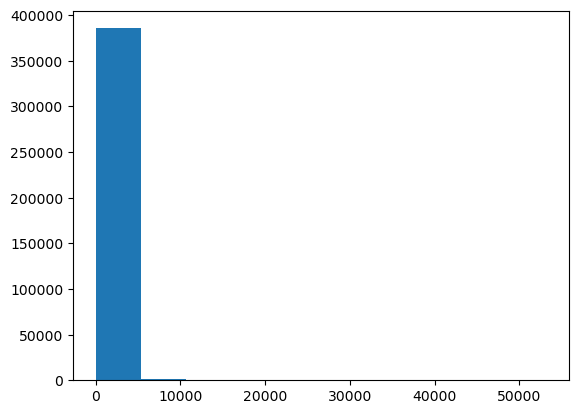

In [6]:
plt.hist(df['_DRNKWK1'])
plt.show() 


### Doma's changes

- Collect state related attributes (party affiliation, region and division)
    - FIPS code to state names and abbreviation [link](https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm)
    - State region and division [link](https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv)
    - State's party affiliation [link](https://www.pewresearch.org/religion/religious-landscape-study/compare/party-affiliation/by/state/)

- Merge above three files into one 
    - `State_attributes.csv` [link](https://drive.google.com/file/d/117yTpjT3GFYgKAFM3HJHl67DaZToTQMU/view?usp=drive_link)
-  Detail in `Doma_EDA.ipynb` [link](https://github.com/laurenc8/ds4a-obesity)

#### Add states' attributes

In [7]:
state_df = pd.read_csv("State_attributes.csv")
state_df.head()

,State_name,State_abb,_STATE,Republican,No_lean,Democrat,Region,Division
0,Alabama,AL,1,0.52,0.13,0.35,South,East South Central
1,Alaska,AK,2,0.39,0.29,0.32,West,Pacific
2,Arizona,AZ,4,0.40,0.21,0.39,West,Mountain
3,Arkansas,AR,5,0.46,0.16,0.38,South,West South Central
4,California,CA,6,0.30,0.21,0.49,West,Pacific


In [8]:
state_df.describe()

,_STATE,Republican,No_lean,Democrat
count,53.000000,53.000000,53.000000,53.000000
mean,30.698113,0.392075,0.177925,0.430000
std,17.883797,0.082866,0.030719,0.082299
min,1.000000,0.110000,0.100000,0.250000
25%,17.000000,0.330000,0.160000,0.390000
50%,30.000000,0.400000,0.180000,0.430000
75%,44.000000,0.440000,0.190000,0.470000
max,78.000000,0.570000,0.290000,0.730000


In [9]:
df = df.merge(state_df, on = "_STATE")

In [10]:
df.drop(columns=["State_name", "State_abb","_STATE"], inplace=True)

#### Fill in missing data and convert numeric values to strings where needed

In [11]:
# PHYSHLTH: Number of days without good physical health within past 30 days
# MENTHLTH: Number of days without good mental health within past 30 days

def replace_PHS_MEN_median(df_name, colnames):
    for colname in colnames:
        med_30less = df_name[df_name[colname]<= 30][[colname]].median()
        print(med_30less)
        df_name[colname].fillna(med_30less, inplace = True)
        #replace None with 0
        df_name.replace({colname: { np.nan:med_30less, 77:med_30less,  88:0, 99:med_30less}}, inplace = True)
    return df_name

df = replace_PHS_MEN_median(df, ['PHYSHLTH', 'MENTHLTH'])


PHYSHLTH    6.0
dtype: float64
MENTHLTH    7.0
dtype: float64


In [12]:
# ASTHMA3: Ever told) (you had) asthma
# HAVARTH5: Has a doctor, nurse or other health professional ever told you that you had some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia? 
# _MICHD: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

def create_str_cat(df_name, colnames):
    for colname in colnames:
        print(colname)
        print(df_name[colname].unique())
        df_name[colname].fillna('BLANK', inplace = True)
        df_name.replace({colname: {1:'Yes',  2:'No', 7:'Not Sure', 9:'Refused', np.nan:'BLANK'}}, inplace = True)
        print(df_name[colname].unique())
    return df_name

df = create_str_cat(df, ['ASTHMA3', '_MICHD', 'HAVARTH5'])

ASTHMA3
[1. 2. 7. 9.]
['Yes' 'No' 'Not Sure' 'Refused']
_MICHD
[ 2.  1. nan]
['No' 'Yes' 'BLANK']
HAVARTH5
[1. 2. 7. 9.]
['Yes' 'No' 'Not Sure' 'Refused']


In [13]:
# RENTHOM1: Rent or Own home
print(df['RENTHOM1'].unique())
df['RENTHOM1'].fillna('BLANK', inplace = True)
df.replace({'RENTHOM1': {1:'Own',  2:'Rent', 3:'Other', 7:'BLANK', 9:'BLANK',  np.nan:'BLANK'}}, inplace = True)
print(df['RENTHOM1'].unique())


[1. 3. 2. 9. 7.]
['Own' 'Other' 'Rent' 'BLANK']


In [14]:
# PRIMINSR: Primary Insurance
df['PRIMINSR'].fillna('BLANK', inplace = True)
df.replace({'PRIMINSR': {1:'Employer',  2:'Private', 3:'Medicare', 4:'Medigap',  5:'Medicaid', 6:'Children Health Insurance Program', 7:'Military', 8:'Indian Health Service', 9:'State sponsored', 10:'Other government',  88:'No coverage', 77:'BLANK', 99:'BLANK', np.nan:'BLANK'}}, inplace = True)
print(df['PRIMINSR'].unique())

['Medicare' 'Private' 'Employer' 'BLANK' 'No coverage' 'Medicaid'
 'Military' 'Other government' 'State sponsored' 'Medigap'
 'Indian Health Service' 'Children Health Insurance Program']


In [15]:
# EXERANY2: Exercise in Past 30 Days 
print(df['EXERANY2'].unique())
df['EXERANY2'].fillna('BLANK', inplace = True)
df.replace({'EXERANY2': {1:'Yes',  2:'No', 3:'Other', 7:'BLANK', 9:'BLANK',  np.nan:'BLANK'}}, inplace = True)
print(df['EXERANY2'].unique())

[2. 1. 7. 9.]


['No' 'Yes' 'BLANK']


### Tanisha's changes

In [16]:

df = df[df["_EDUCAG"] != 9]
df = df[(df["INCOME3"] != 77) & (df["INCOME3"] != 99)]
df = df[(df["_PRACE1"] != 77) & (df["_PRACE1"] != 99)]
df = df[df["_HISPANC"] != 9]

print(df.shape)

(312401, 30)


In [17]:
df.replace({'_PRACE1': {1:'White', 
                               2:'Black or African American', 
                               3:'American Indian or Alaskan Native', 
                               4:'Asian',
                               5:'Native Hawaiian or other Pacific Islander',
                               6:'Other race',
                               7:'No preferred race', 
                               8:'Multiracial but preferred race not answered'},
                '_HISPANC':{1:'Hispanic, Latino/a, or Spanish origin', 
                            2:'Not of Hispanic, Latino/a, or Spanish origin'}, 
                '_SEX':{1:'Male', 
                        2:'Female'}, 
                '_AGEG5YR':{1:'Age 18 to 24', 
                            2:'Age 25 to 29', 
                            3:'Age 30 to 34', 
                            4:'Age 35 to 39',
                            5:'Age 40 to 44', 
                            6:'Age 45 to 49',
                            7:'Age 50 to 54', 
                            8:'Age 55 to 59',
                            9:'Age 60 to 64', 
                            10:'Age 65 to 69', 
                            11:'Age 70 to 74', 
                            12:'Age 75 to 79', 
                            13:'Age 80 or older'}, 
                '_EDUCAG':{1:'Did not graduate High School', 
                           2:'Graduated High School', 
                           3:'Attended College or Technical School', 
                           4:'Graduated from College or Technical School'},
                'INCOME3': {1:"Less than $10,000", 
                            2:"$10,000 to < $15,000",
                            3:"$15,000 to < $20,000", 
                            4:"$20,000 to < $25,000", 
                            5:"$25,000 to < $35,000", 
                            6:"$35,000 to < $50,000", 
                            7:"$50,000 to < $75,000", 
                            8:"$75,000 to < $100,000", 
                            9:"$100,000 to < $150,000", 
                            10:"$150,000 to < $200,000",
                            11:"$200,000 or more"}},
                inplace = True)
                       
#check if any columns with nan left 
df.columns[df.isna().any()].tolist()

['INCOME3']

In [18]:
# check if all data types are converted correctly for model
pd.DataFrame(df.dtypes)

,0
PHYSHLTH,float64
MENTHLTH,float64
PRIMINSR,object
EXERANY2,object
ASTHMA3,object
HAVARTH5,object
RENTHOM1,object
INCOME3,object
_MICHD,object
_PRACE1,object


### Hypothesis Testing

#### 1. Is there a significant diffence in BMI between male and female? 


In [19]:
df.columns

Index(['PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'EXERANY2', 'ASTHMA3', 'HAVARTH5',
       'RENTHOM1', 'INCOME3', '_MICHD', '_PRACE1', '_HISPANC', '_SEX',
       '_AGEG5YR', 'HTIN4', '_BMI5', '_BMI5CAT', '_CHLDCNT', '_EDUCAG',
       '_DRNKWK1', 'FTJUDA2_', 'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_', 'POTADA1_',
       'VEGEDA2_', 'Republican', 'No_lean', 'Democrat', 'Region', 'Division'],
      dtype='object')

In [20]:
male_df = df[df['_SEX'] == "Male"]
print(f"Number of male respondents: {len(male_df)}")
female_df = df[df['_SEX'] == "Female"]
print(f"Number of female respondents: {len(female_df)}")

Number of male respondents: 153356
Number of female respondents: 159045


In [21]:
def plot_class_bmi(col):
    fig = plt.figure(figsize=(10,6))
    medians = df.groupby(col)._BMI5.median().values
    colors = ['#1f77b4', '#ff7f0e']
    print(col)
    unq_vals = list(df[col].unique())
    for i in range(2):
        A = df[df[col] == unq_vals[i]]["_BMI5"]
        print(f"Median of {unq_vals[i]} is {medians[i]}")
        plt.axvline(medians[i], color=colors[i], linestyle='dashed', linewidth=1)
        sns.distplot(a=A, label = unq_vals[i])
        #.axvline(medians[i], color=colors[i], linestyle='dashed', linewidth=1)
    # fig.legend(labels=unq_vals)
    plt.legend()
    
def check_ks(df1, class_type1, df2, class_type2 ):
    print("Kolmogorov-Smirnov test ")
    
    ks_stats, ks_p_val = stats.kstest(df1["_BMI5"], df2["_BMI5"])
    if ks_p_val < 0.05:
        print("Reject the null hypothesis that two distibutions are the same, and assume that the two distributions are different")
    else:
        print("There is not enough evidence to reject the null hypothesis that two distibutions are the same")
    del ks_stats, ks_p_val
    
    ks_stats, ks_p_val = stats.kstest(df1["_BMI5"], df2["_BMI5"], alternative='less')
    if ks_p_val < 0.05:
        print(f"Reject the null hypothesis {class_type1} >= {class_type2}, and assume that {class_type1} < {class_type2}")
    else:
        print(f"There is not enough evidence to reject the null hypothesis {class_type1} >= {class_type2}")
    del ks_stats, ks_p_val
    
    ks_stats, ks_p_val = stats.kstest(df1["_BMI5"], df2["_BMI5"], alternative='greater')
    if ks_p_val < 0.05:
        print(f"Reject the null hypothesis {class_type1} <= to {class_type2}, and assume that {class_type1} > {class_type2}")
    else:
        print(f"There is not enough evidence to reject the null hypothesis {class_type1} <= {class_type2}")
    del ks_stats, ks_p_val, df1, df2

def check_mannwhitneyu(df1, class_type1, df2, class_type2 ):
    print("Mann-Whitney U rank test")
    
    mwu_stats, mwu_p_val = stats.mannwhitneyu(df1["_BMI5"], df2["_BMI5"])
    if mwu_p_val < 0.05:
        print("Reject the null hypothesis that two distibutions are the same, and assume that the two distributions are different")
    else:
        print("There is not enough evidence to reject the null hypothesis that two distibutions are the same")
    del mwu_stats, mwu_p_val
    
    mwu_stats, mwu_p_val = stats.mannwhitneyu(df1["_BMI5"], df2["_BMI5"], alternative='less')
    if mwu_p_val < 0.05:
        print(f"Reject the null hypothesis {class_type1} >= {class_type2}, and assume that {class_type1} < {class_type2}")
    else:
        print(f"There is not enough evidence to reject the null hypothesis {class_type1} >= {class_type2}")
    del mwu_stats, mwu_p_val
    
    mwu_stats, mwu_p_val = stats.mannwhitneyu(df1["_BMI5"], df2["_BMI5"], alternative='greater')
    if mwu_p_val < 0.05:
        print(f"Reject the null hypothesis {class_type1} <= {class_type2}, and assume that {class_type1} > {class_type2}")
    else:
        print(f"There is not enough evidence to reject the null hypothesis {class_type1} <= {class_type2}")
    del mwu_stats, mwu_p_val, df1, df2


def check_ttest_ind(df1, class_type1, df2,class_type2, eq_variance):
    print("Independent t-test")
    
    ttest_stats, ttest_p_val = stats.ttest_ind(df1["_BMI5"], df2["_BMI5"], equal_var=eq_variance)
    if ttest_p_val < 0.05:
        print("Reject the null hypothesis that two distibutions are the same, and assume that the two distributions are different")
    else:
        print("There is not enough evidence to reject the null hypothesis that two distibutions are the same")
    del ttest_stats, ttest_p_val
    
    ttest_stats, ttest_p_val = stats.ttest_ind(df1["_BMI5"], df2["_BMI5"], equal_var=eq_variance, alternative='less')
    if ttest_p_val < 0.05:
        print(f"Reject the null hypothesis {class_type1} >= {class_type2}, and assume that {class_type1} < {class_type2}")
    else:
        print(f"There is not enough evidence to reject the null hypothesis {class_type1} >= {class_type2}")
    del ttest_stats, ttest_p_val
    
    ttest_stats, ttest_p_val = stats.ttest_ind(df1["_BMI5"], df2["_BMI5"], equal_var=eq_variance, alternative='greater')
    if ttest_p_val < 0.05:
        print(f"Reject the null hypothesis {class_type1} <= {class_type2}, and assume that {class_type1} > {class_type2}")
    else:
        print(f"There is not enough evidence to reject the null hypothesis {class_type1} <= {class_type2}")
    del ttest_stats, ttest_p_val

from scipy.stats import variation

def check_variability(arr1, arr2):
    var_1 = variation(arr1, ddof=1)
    var_2 = variation(arr2, ddof=1)
    print(var_1, var_2)
    print(abs(var_1-var_2))


_SEX
Median of Female is 27.44
Median of Male is 27.88


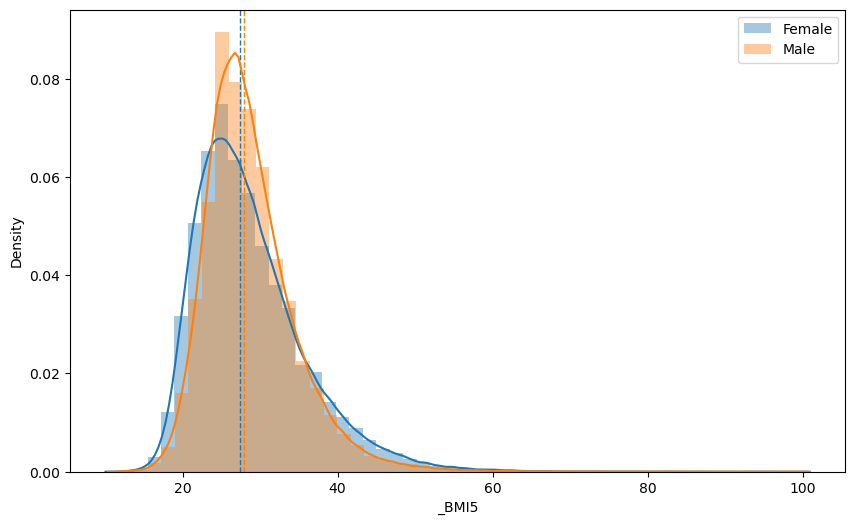

In [22]:
male_df = df[df['_SEX'] == "Male"]
female_df = df[df['_SEX'] == "Female"]
import warnings
warnings.filterwarnings("ignore")

plot_class_bmi("_SEX")


In [23]:
check_variability(male_df['_BMI5'], female_df['_BMI5'])   

0.2058911952381333 0.24869928924130955
0.042808094003176256



**Shows Low intervariability and similar variability, so we perform independent t-test**

In [24]:
print(check_ks(male_df, "male", female_df, "female"))

print(check_mannwhitneyu(male_df, "male", female_df, "female"))

print(check_ttest_ind(male_df, "male", female_df, "female", eq_variance = True))

Kolmogorov-Smirnov test 
Reject the null hypothesis that two distibutions are the same, and assume that the two distributions are different
Reject the null hypothesis male >= female, and assume that male < female
Reject the null hypothesis male <= to female, and assume that male > female
None
Mann-Whitney U rank test
Reject the null hypothesis that two distibutions are the same, and assume that the two distributions are different
There is not enough evidence to reject the null hypothesis male >= female
Reject the null hypothesis male <= female, and assume that male > female
None
Independent t-test
There is not enough evidence to reject the null hypothesis that two distibutions are the same
There is not enough evidence to reject the null hypothesis male >= female
There is not enough evidence to reject the null hypothesis male <= female
None



#### 2. Are men more likely to be obese than female?

In [25]:
from scipy.stats import chi2_contingency 
import numpy as np

df["is_obese"] = np.where(df["_BMI5CAT"] == 4, "is obese", "not obese")


In [26]:
def check_dependence_cat(col):
    chisqt = pd.crosstab(df.is_obese, df[col], margins=True)
    print(pd.DataFrame(chisqt), "\n")

    value = np.array([chisqt.iloc[0][0:5].values,
                    chisqt.iloc[1][0:5].values])
    chi2_value, p_value, degree_of_freedom = chi2_contingency(value)[0:3]
    print(f"Chi-square value: {chi2_value}\n", f"p value: {p_value}\n",  f"degree of freedom: {degree_of_freedom}\n")

    if p_value < 0.05:
        print(f'We reject the null hypothesis and assume that there is a relationship between variables {col} and being obese')
    else:
        print(f"We don't reject the null hypothesis and assume that there is no relationship between variables {col} and being obese")


check_dependence_cat("_SEX")

_SEX       Female    Male     All
is_obese                         
is obese    56180   52153  108333
not obese  102865  101203  204068
All        159045  153356  312401 

Chi-square value: 59.64909693431776
 p value: 1.1152267436414575e-13
 degree of freedom: 2

We reject the null hypothesis and assume that there is a relationship between variables _SEX and being obese



#### 2. Are people in the west and east coast less likely to be obese than people in the middle region

In [27]:
df['is_coast'] = np.where((df['Region'] == 'West') | (df['Region'] == 'Northeast'), "coast", "not coast")

In [28]:
df['is_coast'].unique()

array(['not coast', 'coast'], dtype=object)

is_coast
Median of not coast is 27.26
Median of coast is 28.06


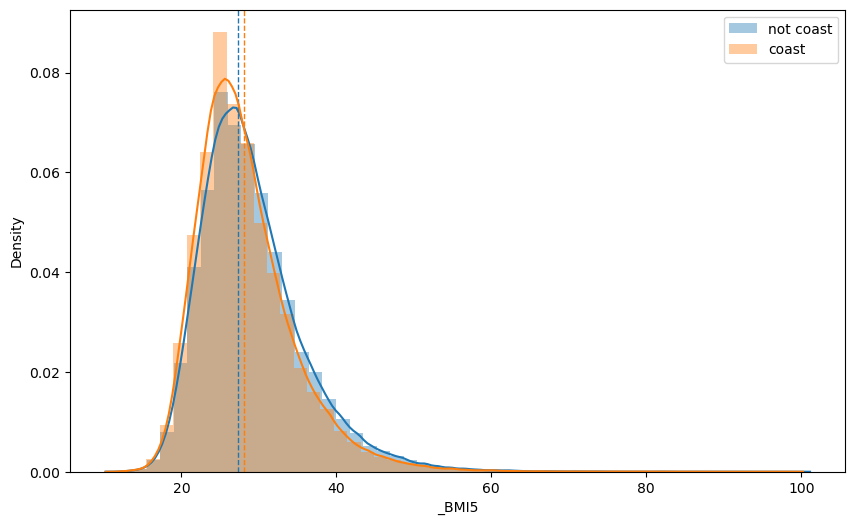

In [29]:
plot_class_bmi("is_coast")

In [30]:
coast_region_df = df[(df['is_coast'] == 'coast')]
mid_region_df = df[(df['is_coast'] == 'not coast')]

check_variability(coast_region_df['_BMI5'], mid_region_df['_BMI5'])   

0.22473489607215835 0.23058772230835892
0.0058528262362005645


In [31]:
print(check_ks(coast_region_df, "West and Northeast", mid_region_df, "South and Midwest"))
print(check_mannwhitneyu(coast_region_df, "West and Northeast", mid_region_df, "South and Midwest"))
print(check_ttest_ind(coast_region_df, "West and Northeast", mid_region_df, "South and Midwest", eq_variance = True))

Kolmogorov-Smirnov test 
Reject the null hypothesis that two distibutions are the same, and assume that the two distributions are different
There is not enough evidence to reject the null hypothesis West and Northeast >= South and Midwest
Reject the null hypothesis West and Northeast <= to South and Midwest, and assume that West and Northeast > South and Midwest
None
Mann-Whitney U rank test
Reject the null hypothesis that two distibutions are the same, and assume that the two distributions are different
Reject the null hypothesis West and Northeast >= South and Midwest, and assume that West and Northeast < South and Midwest
There is not enough evidence to reject the null hypothesis West and Northeast <= South and Midwest
None
Independent t-test
Reject the null hypothesis that two distibutions are the same, and assume that the two distributions are different
Reject the null hypothesis West and Northeast >= South and Midwest, and assume that West and Northeast < South and Midwest
There 

In [32]:
check_dependence_cat("is_coast")

is_coast    coast  not coast     All
is_obese                            
is obese    43411      64922  108333
not obese   94724     109344  204068
All        138135     174266  312401 

Chi-square value: 1155.415017947835
 p value: 1.272965690582545e-251
 degree of freedom: 2

We reject the null hypothesis and assume that there is a relationship between variables is_coast and being obese



#### 3. Are people who own home less likely to be obese than people who rent or live in other conditions

In [33]:
df['RENTHOM1'].unique()

array(['Own', 'Other', 'Rent', 'BLANK'], dtype=object)

is_home_owner
Median of owns home is 27.46
Median of doesn't own home is 27.47


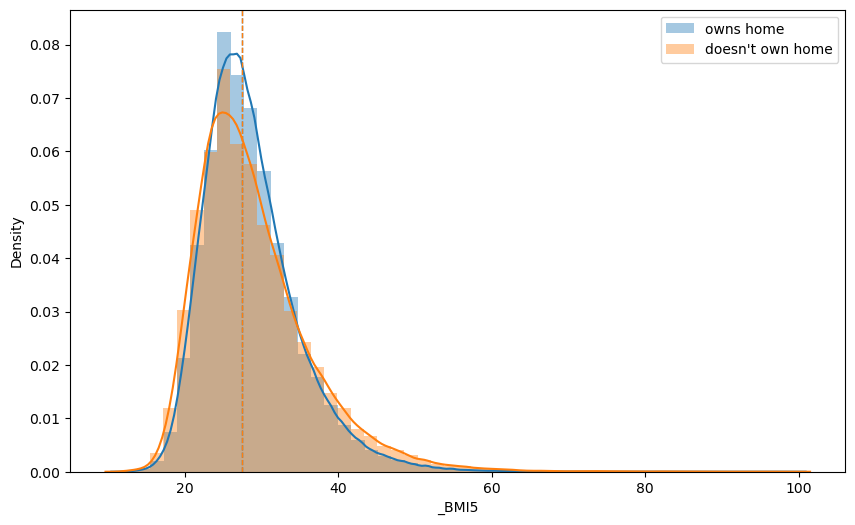

In [34]:
df["is_home_owner"] = np.where(df['RENTHOM1'] == 'Own', "owns home", "doesn't own home")
plot_class_bmi("is_home_owner")

In [35]:
own_home_df = df[(df['RENTHOM1'] == 'Own')]
dont_own_home_df = df[(df['RENTHOM1']  != 'Own')]
check_variability(own_home_df['_BMI5'], dont_own_home_df['_BMI5'])   

0.2160746737973458 0.25786072898572193
0.04178605518837614


In [36]:
print(check_ks(own_home_df, "owns home", dont_own_home_df, "doesn't own home"))
print(check_mannwhitneyu(own_home_df, "owns home", dont_own_home_df, "doesn't own home"))
print(check_ttest_ind(own_home_df, "owns home", dont_own_home_df, "doesn't own home", eq_variance = True))

Kolmogorov-Smirnov test 


Reject the null hypothesis that two distibutions are the same, and assume that the two distributions are different
Reject the null hypothesis owns home >= doesn't own home, and assume that owns home < doesn't own home
Reject the null hypothesis owns home <= to doesn't own home, and assume that owns home > doesn't own home
None
Mann-Whitney U rank test
Reject the null hypothesis that two distibutions are the same, and assume that the two distributions are different
There is not enough evidence to reject the null hypothesis owns home >= doesn't own home
Reject the null hypothesis owns home <= doesn't own home, and assume that owns home > doesn't own home
None
Independent t-test
Reject the null hypothesis that two distibutions are the same, and assume that the two distributions are different
Reject the null hypothesis owns home >= doesn't own home, and assume that owns home < doesn't own home
There is not enough evidence to reject the null hypothesis owns home <= doesn't own home
None


In [37]:
check_dependence_cat("is_home_owner")

is_home_owner  doesn't own home  owns home     All
is_obese                                          
is obese                  31227      77106  108333
not obese                 54974     149094  204068
All                       86201     226200  312401 

Chi-square value: 125.9808603150751
 p value: 4.401531049949438e-28
 degree of freedom: 2

We reject the null hypothesis and assume that there is a relationship between variables is_home_owner and being obese
